<a href="https://colab.research.google.com/github/DanielSantosSouza/Data-Science/blob/main/Panorama_do_COVID_19_no_Mundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19 no Mundo

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Mundo, irei realizar uma análise sobre os dados públicos da doença.

# Obtenção dos Dados

Os dados foram obtidos [aqui](https://github.com/owid/covid-19-data/tree/master/public/data). Trata-se de um repositório com os dados do COVID-19 no mundo e nele, podemos obter informações relacionadas a casos confirmados, mortalidade, hospitalizações e admissões em Unidades de Terapia Intensiva (UTI), testes e positividade e diversas outras informações.
Segundo o repositório, os dados possuem a seguinte origem:

* Casos confirmados e de morte: são proveninentes do COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) da Universidade Johns Hopkins (JHU);

* Hospitalizações e admissões em unidades de terapia intensiva (UTI): São provenientes da European Centre for Disease Prevention and Control (ECDC) para um número seleto de países europeus e fontes governamentais para o Reino Unido, Estados Unidos, Canadá, Israel, Argélia, Suíça, Sérvia, Malásia;

* Teste para COVID-19: esses dados são coletados pela equipe Our World in Data a partir de relatórios oficiais;

* Vacinações contra COVID-19: esses dados são coletados pela equipe Our World in Data a partir de relatórios oficiais.

* Outras variáveis: São coletados de uma variedade de fontes (Nações Unidas, Banco Mundial, Carga Global de Doenças, Escola de Governo Blavatnik, etc.

In [112]:
# instalando bibliotecas necessárias
!pip install bar_chart_race -q

# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bar_chart_race as bcr

# importando o dataset COVID-19 para um DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

# formatação dos dados apresentados
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.set_printoptions(suppress = True)


# Análise dos Dados

##Análise Exploratória dos Dados

Nesta etapa, iremos criar analisar e entender como os dados estão estruturados. 




**Dicionário das variáveis**

Nesta etapa, temos um dicionário com todos os atributos do dataset que está sendo analisado. 

* `iso_code`: Código de três letras para identificação do país;
* `continent`: Continente de localização geográfica;
* `location`: Localização geográfica;
* `date`: Data de observação;
* `total_cases`: Total de casos confirmados de COVID-19;
* `new_cases`: Novos casos confirmados de COVID-19;
* `new_cases_smoothed`: Novos casos confirmados de COVID-19 (Suavizado 7 dias);
* `total_deaths`: Total de mortes atribuidas a COVID-19;
* `new_deaths`: Novas mortes atribuidas a COVID-19;
* `new_deaths_smoothed`: Novas mortes atribuidas a COVID-19 (Suavizado 7 dias);
* `new_cases_per_million`: Novos casos confirmados atribuidos ao COVID-19 por 1.000.000 de pessoas;
* `new_cases_smoothed_per_million`: Novos casos confirmados atribuidos ao COVID-19 por 1.000.000 de pessoas;
* `total_deaths_per_million`: Total de morte atribuidas ao COVID-19 por 1.000.000 de pessoas;
* `new_deaths_per_million`: Novas mortes atribuidas ao COVID-19 por 1.000.000 de pessoas;
* `new_deaths_smoothed_per_million`: Novas mortes atribuidas ao COVID-19 por 1.000.000 de pessoas (Suavizado 7 dias);
* `reproduction_rate`: Estimativa da taxa de reprodução do COVID-19;
* `icu_patients`: Número de pacientes com COVID-19 em unidades de terapia intensiva (UTI) em um determiando dia;
* `icu_patients_per_million`: Número de pacientes com COVID-19 em unidades de terapia intensiva (UTI) em um determiando dia por 1.000.000 de pessoas;
* `hosp_patients`: Número de pacientes COVID-19 no hospital em um determinado dia;
* `hosp_patients_per_million`: Número de pacientes COVID-19 no hospital em um determinado dia por 1.000.000 de pessoas;
* `weekly_icu_admissions`: Número de pacientes de COVID-19 recèm -admitidos em unidades de terapia intensiva (UTI) em uma determinada semana;
* `weekly_icu_admissions_per_million`: Número de pacientes de COVID-19 recèm -admitidos em unidades de terapia intensiva (UTI) em uma determinada semana por 1.000.000 de pessoas;
* `weekly_hosp_admissions`: Número de pacientes COVID-19 recém-admitidos em hospitais em uma determinada semana;
* `weekly_hosp_admissions_per_million`: Número de pacientes COVID-19 recém-admitidos em hospitais em uma determinada semana por 1.000.000 de pessoas;
* `new_tests`: Novos testes para COVID-19;
* `total_tests`: Total de testes para COVID-19;
* `total_tests_per_thousand`: Total de testes para COVID-19 por 1.000 pessoas;
* `new_tests_per_thousand`: Novos testes para COVID-19 por 1.000 pessoas;
* `new_tests_smoothed`: Novos testes para COVID-19 (Suavizado por 7 dias);
* `new_tests_smoothed_per_thousand`: Novos testes para COVID-19 (Suavizado por 7 dias) por 1.000 pessoas;
* `positive_rate`: A parcela de testes de COVID-19 que são positivos, dada como uma média contínua de 7 dias;
* `tests_per_case`: Casos confirmados pela quantidade de testes, dada como uma média contínua de 7 dias;
* `tests_units`: Unidades usadas pelo local para relatar seus dados de teste;
* `total_vaccinations`: Total de doses de vacinas aplicadas;
* `people_vaccinated`: Total de pessoas que receberam pelo menos uma dose da vacina;
* `people_fully_vaccinated`: Número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação;
* `total_booters`: Número total de doses de reforço da vacinação COVID-19 administradas (doses administradas além do número prescrito pelo protocolo de vacinação);
* `new_vaccinations`: Novas doses de vacinação COVID-19 administradas (calculadas apenas para dias consecutivos);
* `new_vaccinations_smoothed`: Novas doses de vacinação COVID-19 administradas (Suavizado por 7 dias);
* `total_vaccinations_per_hundred`: Número total de doses de vacinação COVID-19 administradas por 100 pessoas na população total;
* `people_vaccinated_per_hundred`: Número total de pessoas que receberam pelo menos uma dose de vacina por 100 pessoas na população total;
* `people_fully_vaccinated_per_hundred`: Número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação por 100 pessoas na população total;
* `total_booters_per_hundred`: Número total de doses de reforço da vacinação COVID-19 administradas por 100 pessoas na população total;
* `new_vaccinations_smoothed_per_million`: Novas doses de vacinação COVID-19 administradas (Suavizado por 7 dias) por 1.000.000 de pessoas na população total;
* `new_people_vaccinated_smoothed`: Número diário de pessoas que recebem sua primeira dose de vacina (Suavizado por 7 dias);
* `new_people_vaccinated_smoothed_per_hundred`: Número diário de pessoas recebendo sua primeira dose de vacina (Suavizado por 7 dias) por 100 pessoas na população total;
* `stringency_index`: Índice de Restrição de Resposta do Governo: medida composta com base em 9 indicadores de resposta, incluindo fechamentos de escolas, fechamentos de locais de trabalho e proibições de viagens, redimensionado para um valor de 0 a 100 (100 = resposta mais estrita);
* `population`: População (últimos valores disponíveis);
* `population_density`: Número de pessoas dividido por área terrestre, medido em quilômetros quadrados, ano mais recente disponível;
* `median_age`: Idade média da população, projeção da ONU para 2020;
* `aged_65_older`: Parcela da população com 65 anos ou mais, ano mais recente disponível;
* `aged_70_older`: Parcela da população com 70 anos ou mais em 2015;
* `gdp_per_capita`: Produto interno bruto em paridade de poder de compra (dólares internacionais constantes de 2011), ano mais recente disponível;
* `extreme_poverty`: Parcela da população que vive em pobreza extrema, ano mais recente disponível desde 2010;
* `cardiovac_death_rate`: Taxa de mortalidade por doenças cardiovasculares em 2017 (número anual de mortes por 100.000 pessoas);
* `diabetes_prevalence`: Prevalência de diabetes (% da população de 20 a 79 anos) em 2017;
* `female_smokers`: Parcela de mulheres que fumam, ano mais recente disponível;
* `Male_smokers`: Parcela de homens que fumam, ano mais recente disponível;
* `handwashing_facilities`: Parcela da população com instalações básicas de lavagem das mãos no local, ano mais recente disponível;
* `hospital_beds_per_thousand`: Leitos hospitalares por 1.000 pessoas, ano mais recente disponível desde 2010;
* `life_expectancy`: Expectativa de vida ao nascer em 2019;
* `human_development_index`: Um índice composto que mede o desempenho médio em três dimensões básicas do desenvolvimento humano - uma vida longa e saudável, conhecimento e um padrão de vida decente. Valores para 2019;
* `excess_mortality_cumulative_absolute`: Diferença cumulativa entre o número relatado de mortes desde 1 de janeiro de 2020 e o número projetado de mortes para o mesmo período com base nos anos anteriores.;
* `excess_mortality_cumulative`: Diferença percentual entre o número cumulativo de mortes desde 1º de janeiro de 2020 e as mortes projetadas cumulativas para o mesmo período com base nos anos anteriores;
* `excess_mortality`: Diferença percentual entre o número relatado de mortes semanais ou mensais em 2020–2021 e o número projetado de mortes para o mesmo período com base nos anos anteriores. Para maiores informações;
* `excess_mortality_cumulative_per_million`: Diferença cumulativa entre o número relatado de mortes desde 1º de janeiro de 2020 e o número projetado de mortes para o mesmo período com base nos anos anteriores, por milhão de pessoas;

Antes de iniciar, vamos verificar quantas entradas e atributos o dataset possui. Além disso, verificar o tipo de dados dos atributos.

In [113]:
# visualizar a quantidade de variáveis e entradas
print(f'Quantidade de entradas: {df.shape[1]}')
print(f'Quantidade de atributos: {df.shape[0]}')

Quantidade de entradas: 67
Quantidade de atributos: 149028


In [114]:
# tipo de dados de cada variável
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

Iremos agora verificar a cinco primeiras entradas do dataset.

In [115]:
# visualiando as cinco primeiras linhas do DataFrame
df.head()

iso_code continent  ... excess_mortality excess_mortality_cumulative_per_million
0      AFG      Asia  ...              nan                                     nan
1      AFG      Asia  ...              nan                                     nan
2      AFG      Asia  ...              nan                                     nan
3      AFG      Asia  ...              nan                                     nan
4      AFG      Asia  ...              nan                                     nan

[5 rows x 67 columns]

Após verificarmos os tipos de dados de cada atributo e as 5 primeiras entradas do nosso dataset, convém alterarmos o tipo de dado da variável `date` de objeto para datetime.

In [116]:
# convertendo a coluna date de object para datetime
df['date'] = pd.to_datetime(df['date'])


In [117]:
# visualizando os tipos de dados de cada variável
df.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
human_development_index                           float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

Vamos agora verificar, se há dados nulos no dataset.

In [118]:
# verificando a quantidade de dados nulos em cada variável
((df.isnull() / df.shape[0]).sum() * 100).sort_values(ascending = False)

weekly_icu_admissions                     99.10
weekly_icu_admissions_per_million         99.10
weekly_hosp_admissions_per_million        98.50
weekly_hosp_admissions                    98.50
excess_mortality_cumulative_per_million   96.56
                                           ... 
total_cases                                1.75
population                                 0.67
date                                       0.00
location                                   0.00
iso_code                                   0.00
Length: 67, dtype: float64

Verificamos que os atributos `weekly_icu_admissions`, `weekly_icu_admissions_per_million`, `weekly_hosp_admissions_per_million`, `weekly_hosp_admissions`, `excess_mortality_cumulative_per_million` apresentam mais de 95% dos dados nulos. Optaremos por eliminar essas variáveis, tendo em vista que não irão interferir em nossa análise.



In [119]:
# eliminando as colunas cujas entradas estão vazias
df.drop(columns = ['weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions_per_million', 'weekly_hosp_admissions', 'excess_mortality_cumulative_per_million'], inplace = True)

Iremos agora verificar as principais medidas estatisticas para os atributos presentes no dataset.

In [120]:
# visualizando as principais medidas estatísticas
df.describe()

total_cases  new_cases  ...  excess_mortality_cumulative  excess_mortality
count    146418.00  146412.00  ...                      5125.00           5125.00
mean    2051519.90    7887.95  ...                         8.99             16.21
std    12177752.94   43063.30  ...                        16.68             31.28
min           1.00  -74347.00  ...                       -28.45            -95.92
25%        1468.00       1.00  ...                        -0.87             -0.58
50%       19318.00      67.00  ...                         5.51              7.14
75%      244795.50     899.00  ...                        13.88             22.62
max   276242307.00  908289.00  ...                       115.00            374.20

[8 rows x 57 columns]

É perceptível a presença de outliers. Iremos visualiazar os dados nos quais a entrada `continent` é nula.

In [121]:
# visualizando para quais entradas da variável loocation, a variável continent é nula
df.loc[df['continent'].isnull()]['location'].value_counts()

North America          700
High income            700
Asia                   700
Upper middle income    700
Lower middle income    700
World                  700
Europe                 699
European Union         699
Oceania                697
International          684
Africa                 678
South America          669
Low income             668
Name: location, dtype: int64

Verificamos que correspondem a informações agrupadas, como por exemplo, de continentes. Como o objetivo é obter informações referentes a países, iremos eliminar esses dados do nosso dataset.

In [122]:
# Eliminando as entradas para quais a variável continent é nula.
df.drop(df.loc[df['location'] == 'World'].index, axis = 0, inplace = True)
df.drop(df.loc[df['location'] == 'Asia'].index, axis = 0, inplace = True)
df.drop(df.loc[df['location'] == 'Lower middle income'].index, axis = 0, inplace = True)
df.drop(df.loc[df['location'] == 'North America'].index, axis = 0, inplace = True)
df.drop(df.loc[df['location'] == 'High income'].index, axis = 0, inplace = True)
df.drop(df.loc[df['location'] == 'Upper middle income'].index, axis = 0, inplace = True)
df.drop(df.loc[df['location'] == 'Europe'].index, axis = 0, inplace = True)
df.drop(df.loc[df['location'] == 'European Union'].index, axis = 0, inplace = True)
df.drop(df.loc[df['location'] == 'Oceania'].index, axis = 0, inplace = True)
df.drop(df.loc[df['location'] == 'International'].index, axis = 0, inplace = True)
df.drop(df.loc[df['location'] == 'Africa'].index, axis = 0, inplace = True)
df.drop(df.loc[df['location'] == 'South America'].index, axis = 0, inplace = True)
df.drop(df.loc[df['location'] == 'Low income'].index, axis = 0, inplace = True)


Feito isso, podemos agora verificar os paises na data atual com a maior quantidade de casos de COVID-19.

In [123]:
df.loc[df['date'] == '2021-11-30', ['location', 'total_cases']].sort_values(by = 'total_cases', ascending = False)[0:5]

location  total_cases
141564   United States  48560532.00
63216            India  34596776.00
19779           Brazil  22094459.00
140864  United Kingdom  10246954.00
111558          Russia   9468640.00

Desse modo, os cinco paises com maior quantidade de casos confirmados acumulado até novembro de 2021 são Estados Unidos, India, Brasil, Reino Unido e Russia. 

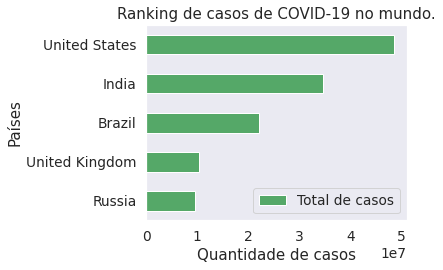

In [126]:
# Selecionando os cinco primeiros paises com maiores quantidade de casos na data 30/11/2021
df_bar = df.loc[((df['location'] == 'United States') | (df['location'] == 'India') | (df['location'] == 'Brazil') | (df['location'] == 'United Kingdom') | (df['location'] == 'Russia')) & (df['date'] == '2021-11-30'), ['location', 'total_cases']].sort_values(by = 'total_cases', ascending = True)[0:5]

fig, ax = plt.subplots()

df_bar.plot(x = 'location', y = 'total_cases', kind='barh', ax = ax, color = 'g', label = 'Total de casos')
ax.set_xticks(list(df_bar['total_cases']), minor = True)
ax.set_title('Ranking de casos de COVID-19 no mundo.')
ax.set_xlabel('Quantidade de casos')
ax.set_ylabel('Países')

plt.tight_layout()

Veremos agora os países com maior quantidades de mortes por COVID-19.

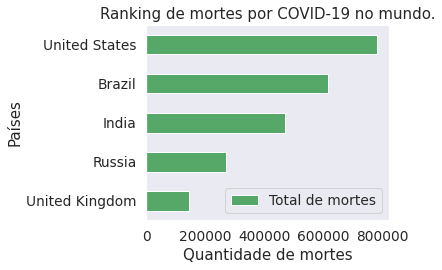

In [127]:
df_bar_2 = df.loc[((df['location'] == 'United States') | (df['location'] == 'India') | (df['location'] == 'Brazil') | (df['location'] == 'United Kingdom') | (df['location'] == 'Russia')) & (df['date'] == '2021-11-30'), ['location', 'total_deaths']].sort_values(by = 'total_deaths', ascending = True)

fig, ax = plt.subplots()

df_bar_2.plot(x = 'location', y = 'total_deaths', kind='barh', ax = ax, color = 'g', label = 'Total de mortes')
ax.set_xticks(list(df_bar_2['total_deaths']), minor = True)
ax.set_title('Ranking de mortes por COVID-19 no mundo.')
ax.set_xlabel('Quantidade de mortes')
ax.set_ylabel('Países')

plt.tight_layout()

Em relação ao total de casos confirmaos de COVID_19, os EUA ocupam a primeira posição, seguidos da India, Brasil, Reino Unido e Russia. Quando analisamos o total de mortes de COVID-19, verificamos que os EUA continuam ocupando a primeira posição com 781.228 mortes, seguidos do Brasil, India, Mexico e Russia. Um ponto importante, é que embora a India possua mais casos de COVID-19 que o Brasil, o mesmo, possui mais mortes do que a India. Por esse motivo, iremos verificar `median_age`, `aged_65_older`, `life_expectancy` para o Brasil e India.

In [129]:
df.loc[((df['location'] == 'India') | (df['location'] == 'Brazil')) & (df['date'] == '2021-11-30'), ['location', 'median_age', 'aged_65_older', 'life_expectancy']]


location  median_age  aged_65_older  life_expectancy
19779   Brazil       33.50           8.55            75.88
63216    India       28.20           5.99            69.66

Veremos agora a evolução dos casos de COVID-19 na India e no Brasil.

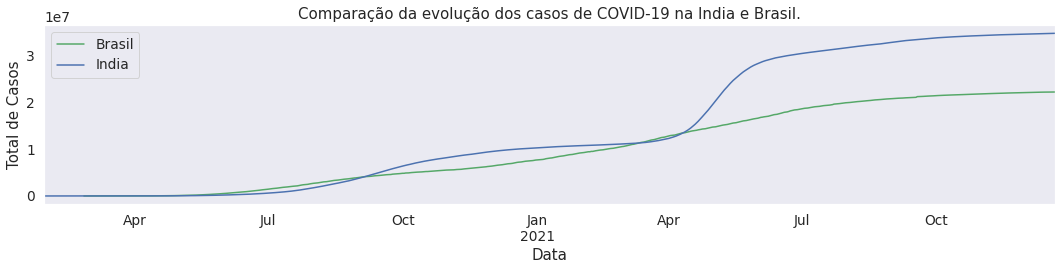

In [130]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 4))

df.loc[df['location'] == 'Brazil'].plot(x = 'date', y = 'total_cases', kind="line", ax=ax, style = '-', label = 'Brasil', color = 'g')

df.loc[df['location'] == 'India'].plot(x = 'date', y = 'total_cases', kind="line", ax=ax, label = 'India')

ax.set_title("Comparação da evolução dos casos de COVID-19 na India e Brasil.")
ax.set_ylabel("Total de Casos")
ax.set_xlabel("Data")

plt.tight_layout()

Por se tratar de uma doença altamente contagiante, muitos países optaram pelo isolamento social para conter os casos de COVID-19, principalmente nos países mais populosos. Iremos agora listar os dez principais países mais populosos.

In [78]:
df.loc[df['date'] == '2021-11-30' ,['location', 'population']].sort_values(by = 'population', ascending = False)[0:9]

location    population
28999           China 1444216102.00
63216           India 1393409033.00
141564  United States  332915074.00
63876       Indonesia  276361788.00
103987       Pakistan  225199929.00
19779          Brazil  213993441.00
99567         Nigeria  211400704.00
11966      Bangladesh  166303494.00
111558         Russia  145912022.00

In [131]:
# Data do primeiro caso de COVID-19 nos EUA.
df.loc[df['location'] == 'India', ['date']].min()

date   2020-01-30
dtype: datetime64[ns]

In [132]:
# Data do primeiro caso de COVID-19 no Brasil.
df.loc[df['location'] == 'Brazil', ['date']].min()

date   2020-02-26
dtype: datetime64[ns]

Como verificado logo acima, o primeiro caso confirmado de COVID-19 no Brasil foi no dia 26/02/2020, aproximadamente um mês após o primeiro caso confirmado na India. Além disso, como podemos visualizar no gráfico acima, em meados de abril de 2021, houve um pico de no número de casos confirmados nos EUA.

No gráfico abaixo, podemos verificar a evolução dos casos de COVID-19 nos países com mais casos confirmados. 

In [51]:
# criando um DataFrame apenas com os cinco paises com maior quantidade de casos
df_ap = df.loc[((df['location'] == 'United States') | (df['location'] == 'India') | (df['location'] == 'Brazil') | (df['location'] == 'United Kingdom') | (df['location'] == 'Russia')), ['date', 'location', 'total_deaths']].sort_values(by = 'date', ascending = False)

# inserindo a variável date como index
df_ap = df_ap.set_index('date')

# pivotando a base
df_ap = pd.pivot_table(df_ap, values = 'total_deaths', columns = 'location', index = 'date')

# criando o plot customizado
bcr.bar_chart_race(
    df=df_ap, # selecionando os dados
    filename = None, # nomeando o arquivo
    orientation = 'h', # orientação do gráfico
    sort = 'desc', # organização 
    n_bars = 10, # número de barras
    fixed_order = False, # ordem fixa
    fixed_max = True, # máximo fixo
    steps_per_period = 5, # steps por período
    interpolate_period = False, # interpolar o período
    label_bars = True, # colocar labels nas barras
    bar_size = .95, # tamanho da barra
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'}, # labels dos períodos
    period_fmt='%B %d, %Y', # formato do período
    period_summary_func = lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total de mortes: {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'Courier New'}, # resumo do período
    perpendicular_bar_func = 'median', # função da barra perpendicular
    period_length = 500,# tamanho do período
    figsize = (5, 3), # tamanho da período
    dpi = 144, 
    cmap = 'dark12', # esquema de cores
    title = 'Mortes por COVID-19', # título
    title_size = '', # tamamnho do título
    bar_label_size = 7, # tamanho do label das barras
    tick_label_size = 7, # tamanho do tick do label
    shared_fontdict = {'family' : 'Helvetica', 'color' : '.1'}, # definindo a fonte
    scale = 'linear', # escala dos dados
    writer = None, # escrever no plot
    fig = None, # definir a figura
    bar_kwargs = {'alpha': .7}, # kwargs
    filter_column_colors = False)  # filtrar cores das colunas

Iremos agora explorar comos esses paises estão em relação a vacinação.

In [133]:
# selecionando os cinco paises com maior quantidade de pessoas que receberam pelo menos uma dose da vacina
df_va = df.loc[df['date'] == '2021-11-30', ['location', 'people_vaccinated', 'people_fully_vaccinated', 'population']].sort_values(by = 'people_vaccinated', ascending = False)[0:5]

# criando uma nova coluna com a porcentagem de pessoas com pelo menos uma dose
df_va['%_Vacinação_1_dose'] = df_va['people_vaccinated'] / df_va['population'] 

# criando uma nova coluna com a porcentagem de pessoas que receberam todas as doses prescritas no protocolo de saúde de cada país
df_va['%_Vacinação_completa'] = df_va['people_fully_vaccinated'] / df_va['population']


Observando os dados de vacinação, temos que três dos países com maior quantidade de casos e mortes por COVID-19 também estão na lista de países cuja população recebeu pelo menos uma dose da vacina. Destacamos aqui o Japão, em que 79% da população já recebeu pelo menos uma dose. No gráfico abaixo, podemos observar os cinco paises com maior percentual de pessoas vacinadas com pelo menos uma dose e a lista de paises com maior quantidade de pessoas vacinadas com todas as doses, segundo o protocolo da vacina de cada país.

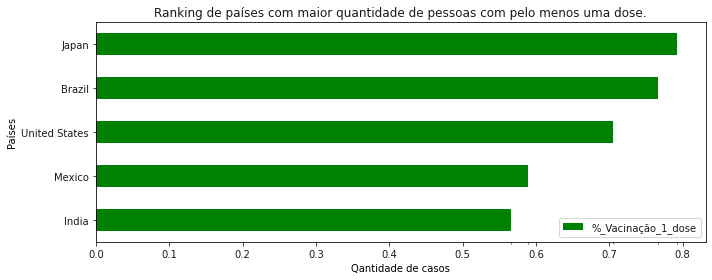

In [53]:
df_va = df_va.sort_values(by = '%_Vacinação_1_dose', ascending = True)

fig, ax = plt.subplots(figsize = (10, 4))

df_va.plot(x = 'location', y = '%_Vacinação_1_dose', kind='barh', ax = ax, color = 'g')
ax.set_xticks(list(df_va['%_Vacinação_1_dose']), minor = True)
ax.set_title('Ranking de países com maior quantidade de pessoas com pelo menos uma dose.')
ax.set_xlabel('Qantidade de casos')
ax.set_ylabel('Países')

plt.tight_layout()

Portanto, conforme evidenciado logo acima, os países com maior quantidade de casos e mortes por COVID-19, também estão entre os países que mais vacinam. 

# Conclusão

Desse modo, os países que estão no TOP 5 de casos de COVID-19, também estão no TOP 5 de países com mais mortes. Além disso, um fato que evidência muito bem a taxa de mortalidade maior em pessoas idosas é o caso da India e Brasil. Embora a India possui mais casos de COVID-19, o Brasil possui uma maior mortalidade. Isso pode ser explicado pela maior expectativad de vida e consequentemente, possuir uma maior quantidade de pessoas com mais de 65 anos.

Outro ponto evidênciado na análise é que os países que possuem mais casos, estão entre os dez países mais populosos.

Além disso, os países que estão no topo com a maior quantidade de casos, também são os paises que mais vacinam. Chamo a atenção para o Brasil que fica atrás apenas do Japão. No Brasil, aproximadamente 80% da população recebeu pelo menos uma dose da vacina. 